**<center><font size=6>CS490: Machine Learning<br>Homework 4</font></center>**

<hr>

# Logistic Regression 

In this assignment, we’ll build a logistic regression classifier and train it on separable and non-separable data. Since it will be specialized to binary classification, we’ve named the class `logisticClassify2`. 

Before we get started, let's include all of our libraries:

In [2]:
from __future__ import division

import numpy as np
np.random.seed(0)

import mltools as ml
import sys
sys.path.append('code')

import matplotlib.pyplot as plt   # use matplotlib for plotting with inline plots
plt.set_cmap('jet');
%matplotlib inline
import warnings
warnings.filterwarnings('ignore'); # for deprecated matplotlib functions

## Generating the Data
To illustrate the impact of the separability of your data on the performance of your classifier, we will start by creating two binary classification datasets, one separable and the other not. We do this by going back to our old friend, the iris data, and creating our two sets from this data. 

In [3]:
iris = np.genfromtxt("data/iris.txt",delimiter=None)
X, Y = iris[:,0:2], iris[:,-1]   # get first two features & target
X,Y  = ml.shuffleData(X,Y)       # reorder randomly rather than by class label
X,_  = ml.transforms.rescale(X)  # rescale to improve numerical stability, speed convergence

XA, YA = X[Y<2,:], Y[Y<2]        # Dataset A: class 0 vs class 1
XB, YB = X[Y>0,:], Y[Y>0]        # Dataset B: class 1 vs class 2

For this problem, we focus on the properties of the logistic regression learning algorithm, rather than classification performance. Thus we will not create a separate validation dataset, and simply use all available data for training.

**For each of the two datasets, create a separate scatter plot in which the training data from the two classes is plotted in different colors. Which of the two datasets is linearly separable?. <span style="color: deepskyblue;">(10 points)</span>**

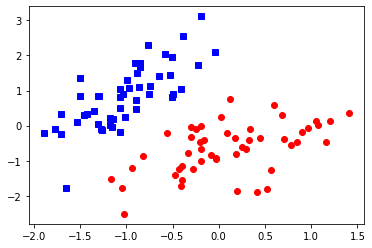

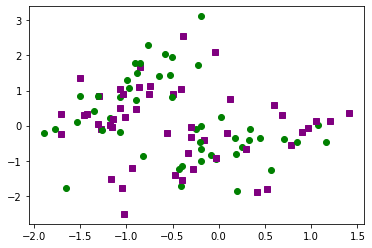

In [4]:
# TODO: Scatter plot of dataset A (with classes in different colors)
for iA in range(XA.shape[0]):
    if (YA[iA] == 1): # YA = 1
        plt.plot(XA[iA,0], XA[iA,1], color='red', marker='o')
    else:             # YA = 0
        plt.plot(XA[iA,0], XA[iA,1], color='blue', marker='s') 
plt.show()

# TODO: Scatter plot of dataset B (with classes in different colors)
for iB in range(XB.shape[0]):
    if (YB[iB] == 2): # YB = 1
        plt.plot(XA[iB,0], XA[iB,1], color='green', marker='o')
    else:             # YB = 0
        plt.plot(XA[iB,0], XA[iB,1], color='purple', marker='s')
        
plt.show()


# Dataset A is linearly seperable.  Dataset B looks like a dartboard.

<hr>

## Computing the Decision Boundary

We can now define our logistic regression classifier `logisticClassify2`. This class inherits from the generic classifier in `mltools` called `ml.classifier`. In this we have a list of the possible classes or y values (e.g., the type of iris for our iris data), a numpy array of the parameter values, theta (i.e., the coefficients in our linear combination), and several functions that you are going to write: `plotBoundary`, which you will define below in `myPlotBoundary` and `predict` and `train`, which we will update in subsequent sections. 

**Write (fill in) the function `myPlotBoundary` below for `logisticClassify2` to compute the points on the decision boundary. <span style="color: deepskyblue;">(15 points)</span>**

`self` refers to the current classifier (i.e., the current instance of `logisticClassify2`) and `X` and `Y` are your X and Y values for your training data. You only need to make sure `x2b` is set correctly using `self.theta` (i.e., the theta parameters from the current classifier). This will plot the data & boundary quickly, which is useful for visualizing the model during training.

In [7]:
# Your function for finding the decision boundary
def myPlotBoundary(self, X,Y):
    """ Plot the (linear) decision boundary of the classifier, along with data """
    if len(self.theta) != 3: raise ValueError('Data & model must be 2D');
    ax = X.min(0),X.max(0); ax = (ax[0][0],ax[1][0],ax[0][1],ax[1][1]);
    
    ## TODO: find points on decision boundary defined by theta0 + theta1 X1 + theta2 X2 == 0
    x1b = np.array([ax[0],ax[1]]);  # at X1 = points in x1b
    
    # Solve theta equation for X1
    boundX2min = (-self.theta[0] - self.theta[1]*x1b[0])/self.theta[2] # this took me a little while to figure out
    # realized that ax[0 and 1] are the max and min of x1 in the whole dataset
    # this means that we just have to find the corresponding x2 to draw our starter boundary
    
    # Solve theta equation for X2
    boundX2max = (-self.theta[0] - self.theta[1]*x1b[1])/self.theta[2]
    
    # TODO find x2 values as a function of x1's values
    x2b = np.array([boundX2min, boundX2max]);      
    
    ## Now plot the data and the resulting boundary:
    A = Y==self.classes[0]; # and plot it:
    plt.plot(X[A,0],X[A,1],'b.',X[~A,0],X[~A,1],'r.',x1b,x2b,'k-'); plt.axis(ax); plt.draw();

    
#-------------------------------------------#    

# Create a shell classifier
class logisticClassify2(ml.classifier):
    classes = []
    theta = np.array( [-1, 0, 0] )   # initialize theta to something
    plotBoundary = myPlotBoundary    # plot the starting boundary
    predict = None                   # these functions will be implemented later
    train = None

**To test your function, plot the decision boundary corresponding to the classifier**
 <br><br>
 
**<center>sign(2 + 6*x1 + −1*x2 )</center>**

**with dataset A, and again with dataset B <span style="color: deepskyblue;">(10 points)</span>**. 

These fixed parameters should lead to an OK classifier on one
data set, but a poor classifier on the other. You can create a “blank” learner and set the theta values as follows:

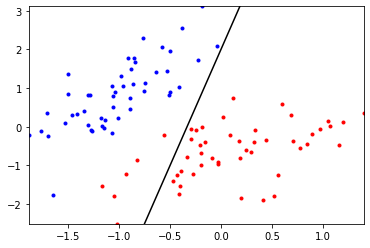

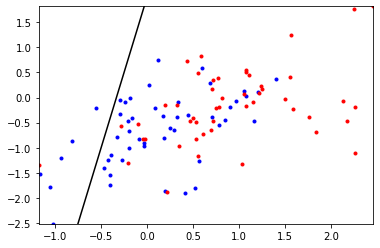

In [8]:
# TODO: fill in theta values
# draw the boundary we just calculated
theta0, theta1, theta2 = 2, 6, -1
testParams = np.array([theta0,theta1,theta2]); 

learnerA = logisticClassify2(); # create "blank" learner

learnerA.classes = np.unique(YA)       # store the class values for dataset A
learnerA.theta = testParams;  # set the learner's parameters
learnerA.plotBoundary(XA,YA)

plt.show()

# TODO: Repeat this for dataset B to create learnerB

learnerB = logisticClassify2();        # create "blank" learner

learnerB.classes = np.unique(YB)       # store the class values for dataset A
learnerB.theta = testParams;           # set the learner's parameters
learnerB.plotBoundary(XB,YB)

plt.show()

<hr>

## Making Predictions

Your `logisticClassify2.predict` function above is currently undefined. Here, you will update this function so your classifier can actually output predictions.

**Complete the `myPredict` function below to make predictions for your classifier. <span style="color: deepskyblue;">(15 points)</span>**

In [9]:
# Prediction function for your logistic2 class:
def myPredict(self,X):
    """ Return the predictied class of each data point in X"""
    if len(self.theta) != 3: raise ValueError('Data & model must be 2D');
        
    ## TODO: compute linear response r[i] = theta0 + theta1 X[i,1] + theta2 X[i,2]
    ## for each i
    setLength = X.shape[0]
    Yhat = [None]*setLength  # create an empty list of length = number of x values
    r = [None]*setLength     # same thing for linear response
    for i in range(setLength):
        r[i] = self.theta[0] + self.theta[1]*X[i,0] + self.theta[2]*X[i,1]     # calculate linear response
        if r[i] > 0:  Yhat[i] = self.classes[1]                                # set predictions list = our 2 classes
        else:  Yhat[i] = self.classes[0]
            
    return np.array(Yhat)    # the ml tools built in function did not like a normal array, I had to send a np array

# Update our shell classifier definition
class logisticClassify2(ml.classifier):
    classes = []
    theta = np.array( [-1, 0, 0] )   # initialize theta to something
    plotBoundary = myPlotBoundary    # decision boundary computation 
    predict = myPredict              # new prediction function
    train = None

**Verify that your function works by computing & reporting the error rate for the classifiers defined in the previous part on both datasets A and B.<span style="color: deepskyblue;"> (5 points)</span>**

In the code, the two classes are stored in the variable `self.classes`, where the first entry is the “negative” class (class 0) and the second entry is the “positive” class (class 1). You should create different learner objects for each dataset, and use the function `learner.err` to compute the MSE; this will automatically call your `logisticClassify2.predict` fucnction an calculate the error. 

**Note:** *Remember that we are using a fixed, hand-selected value of theta; this is chosen to be reasonable for one data set, but not the other. So, the error rate should be about 0.06 for one dataset, and higher for the other.* 

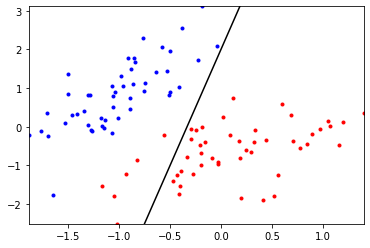

Error (A): 0.06060606060606061


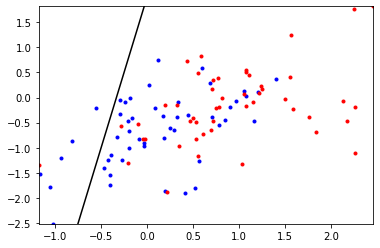

Error: (B) 0.45454545454545453


In [10]:
# call the function we just wrote
# setup our thetas
theta0, theta1, theta2 = 2, 6, -1
testParams = np.array([theta0,theta1,theta2]);
learnerA = logisticClassify2(); # create new "blank" learner using the updated class definition

learnerA.classes = np.unique(YA)       # store the class values for dataset A
learnerA.theta = testParams            # set the learner's parameters using the same values as last time
# we should not pass the learner object to the learner class, the class accepts self as an argument
learnerA.plotBoundary(XA,YA)
plt.show()
print("Error (A):", learnerA.err(XA,YA))

# TODO: repeat this for learnerB from dataset B
learnerB = logisticClassify2(); # create new "blank" learner using the updated class definition

learnerB.classes = np.unique(YB)       # store the class values for dataset A
learnerB.theta = testParams            # set the learner's parameters using the same values as last time
learnerB.plotBoundary(XB,YB)
plt.show()
print("Error: (B)", learnerB.err(XB,YB))

If `predict` is implemented, then the inherited 2D visualization function from ml.classifier should work.

**Use `ml.plotClassify2D` to verify your decision boundaries. <span style="color: deepskyblue;">(5 points)</span>**

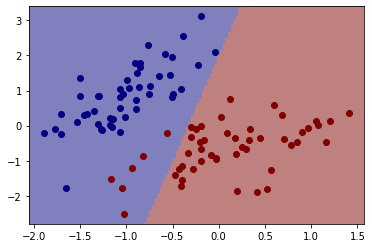

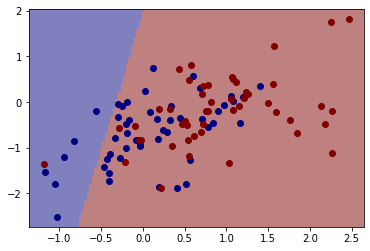

In [11]:
# Plot decision boundary for learnerA

# We do send the learner here
ml.plotClassify2D(learnerA, XA,YA)
plt.show()

# TODO: decision boundary for learnerB
ml.plotClassify2D(learnerB, XB,YB)
plt.show()


<hr>

## Training the Classifier

In the provided training code below, we first transform the classes in the data $Y$ into $YY$, with canonical labels for the two classes: “class0” (negative) and “ class1” (positive). For a single data point $j$ (i.e., a single row from our Xs and Ys), let $r(j) = x_i^{(j)} \cdot \theta=\Sigma_i x_i^{(j)}\theta_i$ denote the linear response of the classifier and $\sigma(r)$ equal the standard logistic function:
$$\sigma(r) = (1 + exp(−r))^{−1}$$.

The logistic negative log-likelihood loss for a single data point $j$ is then:
$$J_j(\theta)=−y^{(j)}log \sigma(x^{(j)} \cdot \theta) − (1−y^{(j)})log(1−\sigma(x^{(j)} \cdot \theta))$$

The gradient of the negative log likelihood $J_j(\theta)$ for logistic regression can be expressed as,
$$\nabla J_j = (\sigma(x^{(j)} \cdot \theta)−y^{(j)})x^{(j)}$$. You will use this expression to implement gradient descent in the next part.

**Complete the `myTrain` function below to perform  gradient descent on the logistic regression loss function for `logisticClassify2`. <span style="color: deepskyblue;">(30 points)</span>**

This will require that you fill in:<br>
(a) the linear response $r(j)$, logistic response $s(j) = \sigma(r(j))$, and gradient $\nabla J_j(\theta)$ associated with each data point $x^{(j)}$, $y^{(j)}$; <br>
(b) the overall loss function, $J = \frac{1}{m} \Sigma_j J_j$, after each pass through the full dataset (or epoch); <br>
(c) a stopping criterion that checks two conditions: stop when either you have reached `stopEpochs` number of epochs, or $J$ has changed by less than `stopTol` since the last epoch.

In [25]:
def myTrain(self, X, Y, initStep=1.0, stopTol=1e-4, stopEpochs=5000, plot=None):
    """ Train the logistic regression using gradient descent """
    from IPython import display
    M,N = X.shape;                     # initialize the model if necessary:
    self.classes = np.unique(Y);       # Y may have two classes, any values
    XX = np.hstack((np.ones((M,1)),X)) # XX is X, but with an extra column of ones
    YY = ml.toIndex(Y,self.classes);   # YY is Y, but with canonical values 0 or 1
    if len(self.theta)!=N+1: self.theta=np.random.rand(N+1);
    # init loop variables:
    epoch=0; done=False; Jnll=[]; J01=[]; s=[None]*M;
    while not done:
        stepsize, epoch = initStep*2.0/(2.0+epoch), epoch+1; # update stepsize 
        # Do a GD pass through the entire data set:
        for i in np.random.permutation(M):
            
            # TODO: compute linear response r(x)
            ri = self.theta[0] + self.theta[1]*X[i, 0] + self.theta[2]*X[i, 1];
            
            # calculate sigmoid function for all ri
            # I''m not exactly sure if we are supposed to use an array here
            # According to the eqn. in the slides, I should be sending an array to use for our surrogate loss function
            s[i] = (1.0+np.exp(-ri))**(-1)
            
            # TODO: compute gradient of NLL loss
            # Using the equation above for J(theta)
            grad1 = (s[i]-YY[i])
            grad2 = (s[i]-YY[i])*X[i,0]
            grad3 = (s[i]-YY[i])*X[i,1]
            gradi = [grad1, grad2, grad3];     
            
            # take a gradient step
            self.theta[0] -= stepsize * gradi[0]   # the original eqn. here wasn't working so I set each of the 3 thetas
            self.theta[1] -= stepsize * gradi[1]   # I would like to know how to multiply a np array by a scalar though 
            self.theta[2] -= stepsize * gradi[2]   # for problems where the number of thetas is much larger

        J01.append( self.err(X,Y) )  # evaluate the current error rate (discrete error rate)

        ## TODO: compute surrogate loss function (logistic negative log-likelihood) so we can compute MSE
        ##  Jsur = - sum_i [ (log si) if yi==1 else (log(1-si)) ]
        
        # this shouldnt work, this is only using the very last s[i]
        # this should be using the entire s[i] array
        # but when I use the entire s[i] array, the training takes significantly longer to get below the error threshold
        # and the decision boundary is rotating in the wrong way
        Jsur = -np.sum([(np.log(s[i])) if YY[i]==1 else (np.log(1-s[i]))])
        
        # TODO evaluate the current negative log-likelihood (NLL) loss
        Jnll.append(Jsur/M) 
        
        # Plot results
        display.clear_output(wait=True);
        
        # plot losses with NLL losses in blue, discrete losses in red
        plt.subplot(plot,2,1); plt.plot(Jnll,'b-',J01,'r-'); 
        
        if N==2: plt.subplot(plot,2,2); self.plotBoundary(X,Y); # plot predictor if 2D and we can draw it
        plt.pause(.01); # let OS draw the plot        

        ## For debugging: you may want to print current parameters & losses
        print (self.theta, ' => ', Jnll[-1], ' / ', J01[-1])
        # raw_input()   # pause for keystroke

        # TODO: check stopping criteria: exit if exceeded # of epochs ( > stopEpochs)
        # or if Jnll not changing between epochs ( < stopTol )
        if (epoch>stopEpochs):
            done = True
        if (epoch>1):
            if (abs(Jnll[-2]-Jnll[-1]) < stopTol):
                done = True     # I was accidentally setting epoch = True for 150 runs of this program
                                # I finally figured out why it wasn't stopping even with insanely J values
        
# Update our shell classifier definition
class logisticClassify2(ml.classifier):
    classes = []
    theta = np.array( [-1, 0, 0] )   # initialize theta to something
    plotBoundary = myPlotBoundary    # 
    predict = myPredict              # Now all parts are implemented
    train = myTrain
    
    plt.rcParams['figure.figsize'] = (20,10)    # make a wide figure, for two subplots to track results

**Run the logistic regression algorithm on both datasets. Describe the parameter choices (step sizes and stopping criteria) you use for each dataset. Include plots showing the convergence of the surrogate loss and error rate as a function of the number of training epochs, and the classification boundary after the final training iteration. (The included function creates plots automatically.) <span style="color: deepskyblue;">(10 points)</span>**


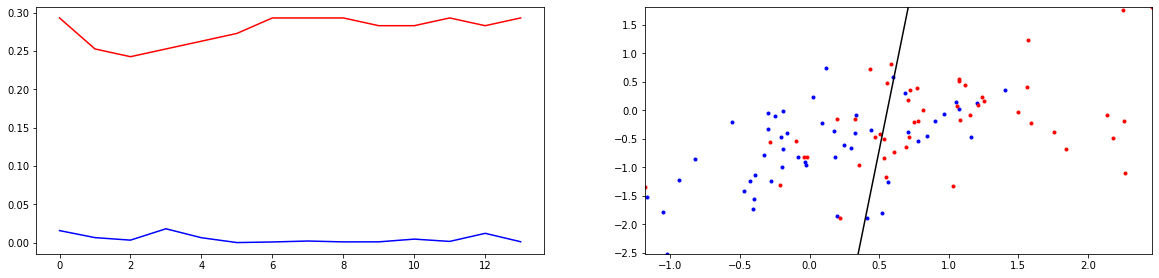

KeyboardInterrupt: 

In [26]:
# Train on dataset A
learnerA = logisticClassify2()
learnerA.theta = np.array([2., 6., -1.]);
learnerA.train(XA,YA,initStep=1e-1,stopEpochs=1000,stopTol=1e-5, plot=1);

ml.plotClassify2D(learnerA,XA,YA)
print("Training error rate: ",learnerA.err(XA,YA))


plt.show()

# I couldnt get the plots to run the right way because we dont pass the plt object to plotBoundaries
# Not sure how to get this to output all the plots at the same time
# Comment out the learnerB logisticClassify2() class call to see the learnerA's data

# TODO: Repeat for dataset B
learnerB = logisticClassify2()
learnerB.theta = np.array([2., 6., -1.]);
learnerB.train(XB,YB,initStep=1e-1,stopEpochs=1000,stopTol=1e-5, plot=2);



ml.plotClassify2D(learnerB,XB,YB)
print("Training error rate: ",learnerB.err(XB,YB))

plt.show()




<hr>

# Statement of Collaboration

It is **mandatory** to include a *Statement of Collaboration* in each submission. Include the names of everyone involved in the discussions (especially in-person ones), and what was discussed. 

In [ ]:
# I, Christopher Pawlenok, collaborated with Seth Falvey on the myTrain function.  
# All other work on Homework 4 is mine and mine only.